In [2]:
import gpxpy
import gpxpy.gpx

# Wczytanie pliku GPX
with open('mik_giz_1.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Wyodrębnienie punktów trasy
punkty_trasy = []
for track in gpx.tracks:
    for segment in track.segments:
        punkty_trasy.extend([(point.latitude, point.longitude) for point in segment.points])

# Wyodrębnienie markerów (węzłów GPX)
markery = [(waypoint.latitude, waypoint.longitude) for waypoint in gpx.waypoints]


In [21]:
from shapely.geometry import Point, LineString

stops = [
    {"name": "Giżycko", "lat": 54.039174, "lon": 21.769777},
    {"name": "Bogaczewo", "lat": 53.965145, "lon": 21.743431},
    {"name": "Kozin", "lat": 53.947064, "lon": 21.721074},
    {"name": "Prażmowo", "lat": 53.918976, "lon": 21.694779},
    {"name": "Szymonka", "lat": 53.895044, "lon": 21.662368},
    {"name": "Szymonka Kolonia", "lat": 53.885029, "lon": 21.655091},
    {"name": "Olszewo", "lat": 53.865103, "lon": 21.651274},
    {"name": "Woźnice", "lat": 53.851797, "lon": 21.627089},
    {"name": "Pszczółki", "lat": 53.852534, "lon": 21.616421},
    {"name": "Woźnice SHR", "lat": 53.846201, "lon": 21.613198},
    {"name": "Tałty", "lat": 53.823045, "lon": 21.59301},
    {"name": "Mikołajki", "lat": 53.802894, "lon": 21.570573}
]

# Tworzenie obiektów Point dla każdego przystanku
stops_points = [Point(stop["lon"], stop["lat"]) for stop in stops]

# Tworzenie LineString z punktów trasy
# Zakładamy, że punkty trasy są już posortowane
route_line = LineString(stops_points)

# Interpolacja pozycji przystanków na linii trasy
stops_on_route = []
for stop in stops:
    point = Point(stop["lon"], stop["lat"])
    # Najbliższy punkt na linii trasy
    nearest_point_on_route = route_line.interpolate(route_line.project(point))
    stops_on_route.append({
        "name": stop["name"],
        "point": nearest_point_on_route
    })

# Wydrukuj wyniki
for stop in stops_on_route:
    print(f"{stop['name']} - POINT({stop['point'].x} {stop['point'].y})")

Giżycko - POINT(21.769777 54.039174)
Bogaczewo - POINT(21.743431 53.965145)
Kozin - POINT(21.721074 53.947064)
Prażmowo - POINT(21.694779 53.918976)
Szymonka - POINT(21.662368 53.895044)
Szymonka Kolonia - POINT(21.655091 53.885029)
Olszewo - POINT(21.651274 53.865103)
Woźnice - POINT(21.627089 53.851797)
Pszczółki - POINT(21.616421 53.852534)
Woźnice SHR - POINT(21.613198 53.846201)
Tałty - POINT(21.59301 53.823045)
Mikołajki - POINT(21.570573 53.802894)


In [16]:
from shapely.geometry import LineString, Point
import numpy as np

# Tworzenie linii z punktów trasy
linia_trasy = LineString(punkty_trasy)

# Przekształcenie trasy na linię prostą
# W tym przykładzie użyjemy pierwszego i ostatniego punktu trasy
linia_prosta = LineString([punkty_trasy[0], punkty_trasy[-1]])

# Obliczenie pozycji markerów na linii prostej
markery_na_linii = []
for marker in markery:
    punkt = Point(marker)
    proporcja = linia_trasy.project(punkt) / linia_trasy.length
    markery_na_linii.append(linia_prosta.interpolate(proporcja))


In [18]:
markery_na_trasie = []
for marker in markery:
    punkt = Point(marker)
    proporcja = linia_trasy.project(punkt) / linia_trasy.length
    markery_na_trasie.append(linia_trasy.interpolate(proporcja))

# Wydrukuj wyniki z większą precyzją
for punkt in markery_na_trasie:
    print(f"POINT ({punkt.x:.6f} {punkt.y:.6f})")

POINT (53.802894 21.570573)
POINT (53.852432 21.621391)
POINT (53.897395 21.662312)
POINT (53.907069 21.673266)
POINT (53.922303 21.702462)
POINT (53.965168 21.743496)
POINT (53.996329 21.751513)
POINT (54.016440 21.739430)
POINT (54.039174 21.769777)
POINT (54.039174 21.769777)
POINT (54.039174 21.769777)


In [12]:
from scipy.spatial.distance import pdist, squareform

# Obliczenie macierzy odległości
odleglosci = pdist(punkty_trasy, metric='euclidean')
macierz_odleglosci = squareform(odleglosci)

In [13]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

# MDS
mds = MDS(n_components=1, dissimilarity='precomputed', random_state=42)
trasa_mds = mds.fit_transform(macierz_odleglosci)

# PCA
pca = PCA(n_components=1)
trasa_pca = pca.fit_transform(np.array(punkty_trasy))

C:\Users\Karol\AppData\Local\Temp\ipykernel_48196\740331584.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(trasa_mds[markery], np.zeros_like(trasa_mds[markery]), c='red', label='Markery')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

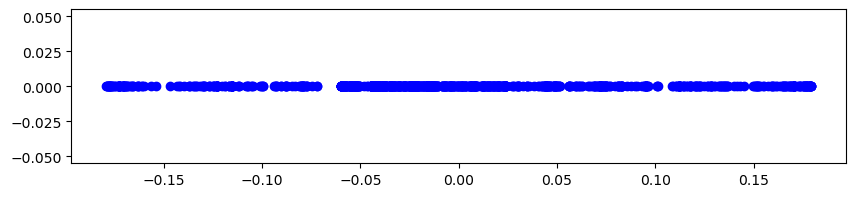

In [14]:
# Wizualizacja MDS
plt.figure(figsize=(10, 2))
plt.scatter(trasa_mds, np.zeros_like(trasa_mds), c='blue', label='Punkty trasy')
plt.scatter(trasa_mds[markery], np.zeros_like(trasa_mds[markery]), c='red', label='Markery')
plt.legend()
plt.title('Reprezentacja trasy za pomocą MDS')
plt.show()

# Wizualizacja PCA
plt.figure(figsize=(10, 2))
plt.scatter(trasa_pca, np.zeros_like(trasa_pca), c='blue', label='Punkty trasy')
plt.scatter(trasa_pca[markery], np.zeros_like(trasa_pca[markery]), c='red', label='Markery')
plt.legend()
plt.title('Reprezentacja trasy za pomocą PCA')
plt.show()

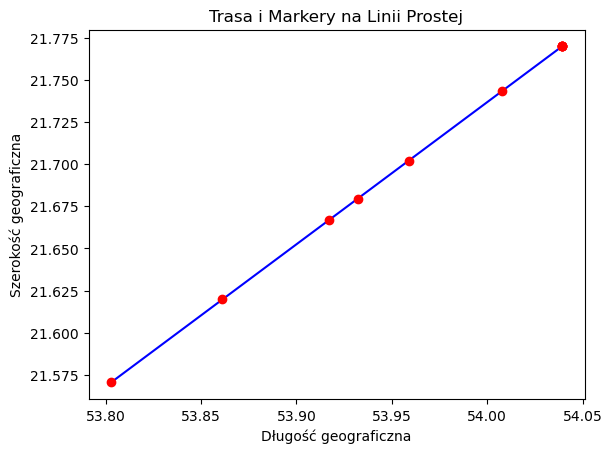

In [8]:
import matplotlib.pyplot as plt

# Wizualizacja linii prostej
x, y = linia_prosta.xy
plt.plot(x, y, 'b')

# Wizualizacja markerów na linii prostej
for marker in markery_na_linii:
    x, y = marker.xy
    plt.plot(x, y, 'ro')  # 'ro' oznacza czerwone okręgi

plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.title('Trasa i Markery na Linii Prostej')
plt.show()

In [9]:
markery_na_linii

[<POINT (53.803 21.571)>,
 <POINT (53.861 21.62)>,
 <POINT (53.917 21.667)>,
 <POINT (53.932 21.68)>,
 <POINT (53.959 21.702)>,
 <POINT (54.008 21.743)>,
 <POINT (54.039 21.77)>,
 <POINT (54.039 21.77)>,
 <POINT (54.039 21.77)>,
 <POINT (54.039 21.77)>,
 <POINT (54.039 21.77)>]